In [1]:
from dgpsi import dgp, kernel, combine, container, lgp, path, emulator, gp
import numpy as np
import matplotlib.pyplot as plt

## Multi-fidelity DGP

In [2]:
f_low  = lambda x: np.sin(3 * x) + 0.3 * x
f_high = lambda x: 1.5 * f_low(x) + 0.3 * np.sin(9 * x) + 0.05 * x**2

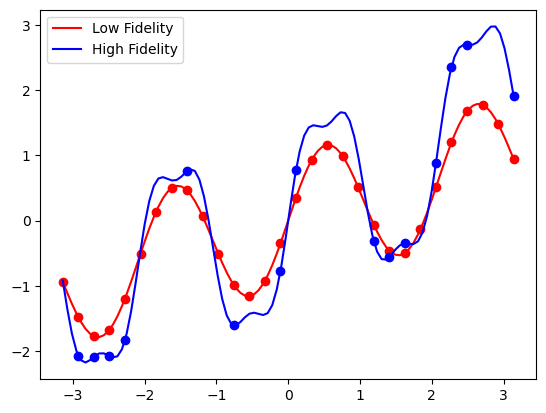

In [43]:
x = np.linspace(-np.pi, np.pi, 100)

n_low = 30
n_high = 15

x_low = np.linspace(-np.pi, np.pi, n_low)
x_high = np.sort(np.random.choice(x_low, size=n_high, replace=False))
overlap_idx = np.nonzero(np.isin(x_low, x_high))[0]
non_overlap_idx = np.nonzero(~np.isin(x_low, x_high))[0]

y_low = f_low(x_low)
y_high = f_high(x_high)
plt.plot(x, f_low(x), label='Low Fidelity', color='r')
plt.scatter(x_low, f_low(x_low), color='r')
plt.plot(x, f_high(x), label='High Fidelity', color='b')
plt.scatter(x_high, f_high(x_high), color='b')
plt.legend()
plt.show()

In [ ]:
input_to_high = y_low[overlap_idx]

### Seperate training two GPs

In [45]:
gp_low = gp(x_low[:,None], y_low[:,None], kernel(length=np.array([1.]), name='sexp'))
gp_low.train()
gp_high = gp(input_to_high[:,None], y_high[:,None], kernel(length=np.array([1.]), name='matern2.5'))
gp_high.train()

In [46]:
struct = [[container(gp_low.export(), local_input_idx=np.array([0]))], 
          [container(gp_high.export(), local_input_idx=np.array([0]))]]
lgp_model = lgp(struct)

In [47]:
pred_mean, pred_var = lgp_model.predict(x[:,None])

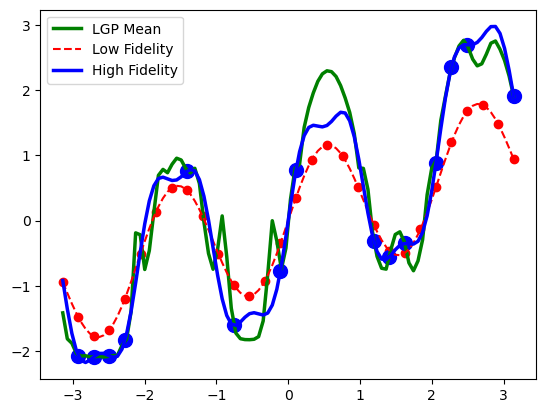

In [48]:
plt.plot(x, pred_mean[0], label='LGP Mean', color='g', lw=2.5)
plt.plot(x, f_low(x), label='Low Fidelity', color='r', linestyle='--')
plt.scatter(x_low, f_low(x_low), color='r')
plt.plot(x, f_high(x), label='High Fidelity', color='b', lw=2.5)
plt.scatter(x_high, f_high(x_high), color='b', s=100)
plt.legend()

### Seperate two deep GPs